<a href="https://colab.research.google.com/github/dataengi44/Code1/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder




In [3]:
# Load the dataset
df = pd.read_csv('car_data.csv')

# Show the first few rows of the dataset
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Display basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Display summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
# Handle missing values (drop rows with missing target values)
df = df.dropna()

# Alternatively, you can fill missing values (example: fill with mean for numerical columns)
# df['Horsepower'].fillna(df['Horsepower'].mean(), inplace=True)


In [9]:
# Display columns to check for categorical variables
df.columns

# Apply one-hot encoding to categorical columns like 'Fuel_Type', 'Transmission', etc.
# You can list all categorical columns you want to one-hot encode, for example:
categorical_columns = ['Present_Price', 'Selling_Price']  # Add any other categorical columns here

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the dataset to confirm encoding
df.head()


,Year,Driven_kms,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,...,Selling_Price_17.0,Selling_Price_18.0,Selling_Price_18.75,Selling_Price_19.75,Selling_Price_19.99,Selling_Price_20.75,Selling_Price_23.0,Selling_Price_23.5,Selling_Price_33.0,Selling_Price_35.0
0,2014,27000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2013,43000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2017,6900,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2011,5200,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,42450,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Create new feature 'Car_Age'
df['Car_Age'] = 2023 - df['Year']  # Assuming the current year is 2023


In [15]:
# Check the column names to confirm 'Price' is present
print(df.columns)



Index(['Year', 'Driven_kms', 'Owner', 'Car_Name_Activa 3g',
       'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       'Car_Name_Bajaj Avenger 220', 'Car_Name_Bajaj Avenger 220 dtsi',
       ...
       'Selling_Price_18.0', 'Selling_Price_18.75', 'Selling_Price_19.75',
       'Selling_Price_19.99', 'Selling_Price_20.75', 'Selling_Price_23.0',
       'Selling_Price_23.5', 'Selling_Price_33.0', 'Selling_Price_35.0',
       'Car_Age'],
      dtype='object', length=407)


In [17]:
# Define features (X) and target (y)
X = df.drop('Driven_kms', axis=1)  # Adjusted to the correct column name
y = df['Driven_kms']  # Adjusted to the correct column name


In [18]:
X = df.drop('Driven_kms', axis=1)  # Replace 'Price' with the actual column name
y = df['Driven_kms']  # Replace 'Price' with the actual column name


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [21]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [24]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Manually compute RMSE by taking the square root of MSE
rmse = np.sqrt(mse)

# R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 11374.558415300546
Mean Squared Error (MSE): 213158190.5037029
Root Mean Squared Error (RMSE): 14599.938030817217
R-squared (R²): 0.6247083393117827


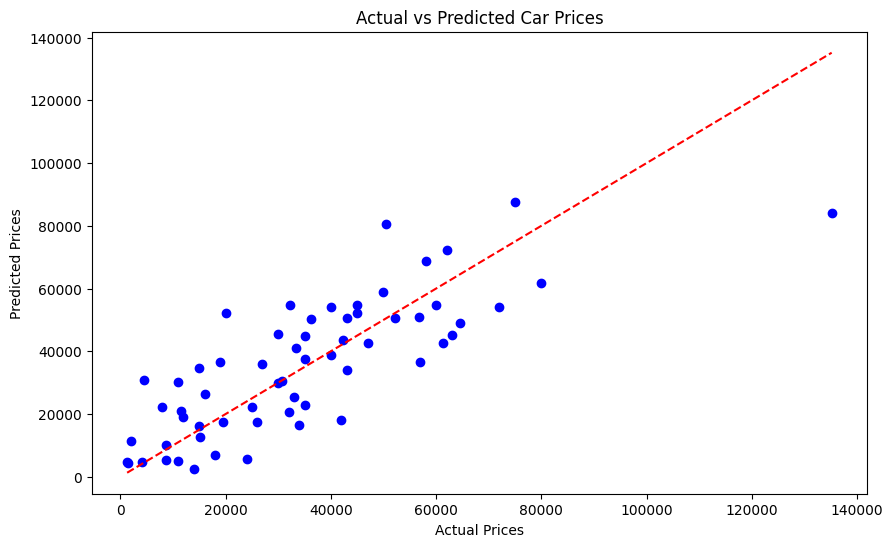

In [25]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
